In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy

In [2]:
#now using .txt files - not even sure if .dat is possible
#should be straightforward to split the input into sections: header, intensity, phase
#splitting on "#" which are in the file between sections
#from there, decompose the header into its necessary fields and the data into numpy arrays



In [65]:
f = open("A1.txt", "r")

#the complete file can be split into its sections by splitting on "#"
#using generators for memory/ease of inspecting one element at a time
sections = (section for section in f.read().strip().split("#\n") if section.strip() != "")

#assign each section to a variable to allow specific processing for each
headerlines = next(sections).strip().split("\n")
intensitylines = next(sections).split("\n")
phaselines = next(sections).strip("#\n").split("\n")

In [99]:
#how to read intensities
#files written 10 values in a line
#will be reshaping to fit the dimensions needed, so easiest to reduce to individual values stored in a single list
#then convert to a numpy array and reshape to suit the dimensions from the header
intensityrows = []
for row in intensitylines:
    for val in row.split():
        intensityrows.append(val)
        
intensitymap = np.array(intensityrows, dtype=float)
# intensrows = intensHeight
# intenscols = intensWidth
intensitymap = intensitymap.reshape(intensHeight,intensWidth)

#same process applies to phase data
phaserows = []
for row in phaselines:
    for val in row.split():
        phaserows.append(val)
        
phasemap = np.array(phaserows, dtype=float)
# phaserows = phaseHeight
# phasecols = phaseWidth
phasemap = phasemap.reshape(phaseHeight,phaseWidth)

In [101]:
#true/false array to mark invalid values (>= 64512 as given in manual)
#(can invert true/false if needed by 1 - intensitymask)
#will use the mask to set nan values in the original map (though map needs to be float array not int to allow this)
#then use the colormap properties to decide how to show these values, distinct from the colour scheme for regular values
#so they do not dominate the scaling of values we want to see
intensitymask = intensitymap >=64512
intensitymap[intensitymask == True] = np.nan

#for phasemap (invalid values are >= 2147483640 as given in manual)
phasemask = phasemap >= 2147483640
phasemap[phasemask == True] = np.nan

#convert to waves/heights as described in manual
#where R has one of two possible values indicated by 0/1 phaseRes field
if phaseRes == "0":
    R = 4096
else:
    R = 32768
waves = phasemap*((intfScaleFactor*obliquityFactor)/R)
heights = waves*wavelengthIn

2.2904915161132814e-06


/local/environments/gw/gw-venv/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  from ipykernel import kernelapp as app


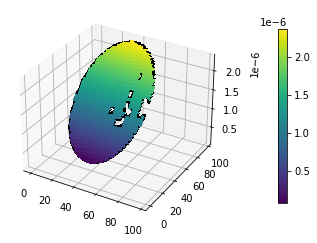

In [105]:
#extracting height max and min for flatness measurements
#np.nanmin/np.nanmax extracts the min/max data with NaN excluded
peak = np.nanmax(heights)
valley = np.nanmin(heights)
peakvalley = peak - valley
print(peakvalley)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.set_zlim(valley, peak)
X,Y = np.arange(0, heights.shape[0]), np.arange(0, heights.shape[1])
x,y = np.meshgrid(X,Y)

current_cmap = copy.copy(cm.get_cmap("viridis"))
p = ax.plot_surface(x,y, heights, antialiased=False, vmin=valley, vmax=peak, cmap=current_cmap)
p.cmap.set_bad("black", alpha=1)

# cbax = fig.add_axes([])
fig.colorbar(p, orientation="vertical", shrink=0.8, pad=0.16)
plt.show()

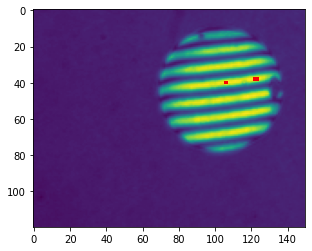

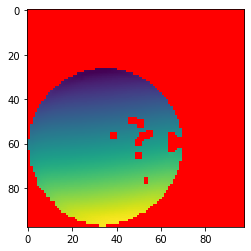

In [35]:
#use the set_bad method of current_cmap to set colour for NaN values
#alpha value can be set also (scaling factor of some sort, not too clear)
#need to set up seperate colour maps otherwise the same one will be used
#can use set_over to limit values but still affected data by magnitude difference
#so better to use set_bad, and set for each plot

current_cmap = copy.copy(cm.get_cmap("viridis"))
# current_cmap.set_over(color="red", alpha=1)
im1 = plt.imshow(intensitymap[120:,:150], cmap=current_cmap)
im1.cmap.set_bad("red", alpha=1)
plt.show()


current_cmap = copy.copy(cm.get_cmap("viridis"))
im2 = plt.imshow(phasemap, cmap=current_cmap)
im2.cmap.set_bad("red", alpha=1)
plt.show()

In [43]:
intensWidth*intensHeight*Nbuckets

76800

In [4]:
#the data is seperated into sections above with header data given by line
#but still need to seperate individual fields within the lines
#this can be done by splitting lines by quotation marks
d = (line.split("\"") for line in headerlines)

In [66]:
#no general loop will be helpful here due to specific formatting
#the data has been simplified enough to step through each line, then each chunk of each line
#to assign to variables by splitting the chunks into their individual parts without whitespaces interfering

#step forward by one, the first line is the single string constant
d = (line.split("\"") for line in headerlines)
stringconstant = next(d)[0]

#step through each chunk and process as required for the fields we need (compare to Metropro documentation)
#several fields will need to be converted to int or float types
#do this by list comprehension on each 'n' in the relevant chunk.split
chunk = next(d)  # - line 2
softwareType, majorVersion, minorVersion, bugVers = [int(n) for n in chunk[0].split()]
softwareDate = chunk[1]

chunk = next(d)  # - line 3
intensOriginX, intensOriginY, intensWidth, intensHeight, Nbuckets, intensRange = [int(n) for n in chunk[0].split()]

chunk = next(d)  # - line 4
phaseOriginX, phaseOriginY, phaseWidth, phaseHeight = [int(n) for n in chunk[0].split()]

chunk = next(d)  # - line 5 (comments)
comments = chunk[1]

chunk = next(d)  # - line 6
partSerNum = chunk[1]
chunk = next(d)  # - line 7
partNum = chunk[1]

chunk = next(d)  # - line 8
source, intfScaleFactor, wavelengthIn, numericAperture, obliquityFactor, magnification, cameraRes, timeStamp = [float(n) for n in chunk[0].split()]

chunk = next(d)  # - line 9
cameraWidth, cameraHeight, systemType, systemBoard, systemSerial, instrumentId = chunk[0].split()
objectiveName = chunk[1]

chunk = next(d)  # - line 10
acquireMode, intensAvgs, PZTCal, PZTGain, PZTGainTolerance, AGC, targetRange, lightLevel, minMod, minModPts = chunk[0].split()

chunk = next(d)  # - line 11
phaseRes, phaseAvgs, minimumAreaSize, disconAction, disconFilter, connectionOrder, removeTiltBias, dataSign, codeVType = chunk[0].split()

chunk = next(d)  # - line 12
subtractSysErr, sysErrFile = chunk[0], chunk[1]

chunk = next(d)  # - line 13
refractiveIndex, partThickness = chunk[0].split()

chunk = next(d)  # - line 14
zoomDesc = chunk[1]

In [62]:
phaseRes

'1'

In [102]:
d = (line.split("\"") for line in headerlines)
for line in d:
    print(line)

['Zygo ASCII Data File - Format 2']
['1 7 6 1 ', 'Thu Aug 09 10:21:55 2001     ', '']
['0 0 320 240 1 255']
['68 103 98 98']
['', '                                                                                 ', '']
['', '                                       ', '']
['', '                                       ', '']
['0 0.5 6.328e-007 0 1 0 0 1464950315']
['320 240 4 0 -4317 0 ', 'Sm Aperture', '']
['0 0 1 1271 3 1 0.1 78.5235 17 50']
['1 5 20 1 0 0 0 0 0']
['0 ', '                           ', '']
['1 0']
['', 'None   ', '']


In [185]:
#function version
#using yields but might not be necessary - probably not worth it, try simple function and array approach
#maybe extend to class setup

def reading(filename):
    with open(filename, "r") as g:
        for section in g.read().split("#"):
            if section.strip() != "":
                lines = section.split("\n")
                yield lines
        
#     g.close()

In [198]:
lines = reading("A1.txt")

In [59]:
#new approach, to reduce complexity and splitting
#can read each line by using next() directly on f
#continue adding lines to (...?) through until the "#" where can update to the new section and change the processing
#could maybe use a dictionary (?) with a list of fieldnames and a list of field values
#then zip them together and create a dict
#this is more for general flow, will still require specific attention to split lines into specific fields and formats
#as this can't be easily looped
with open("A1.txt", "r") as f:
#     c = lambda: next(f)
    sect = 0
    fields = []
    header = []
    txtfields = [0,2,5]
    while sect == 0:
        line = next(f)
        if line.strip() == "#":
            sect = 1
            break
        line = line.strip().split("\n")
        for item in line:
            if item != "":
                item = [it for it in item.split("\"") if it != ""]
                header.append(item)
        
print(header)
# x = zip([i for i in range(len(header))], header)
# d = dict(x)
# d

[['Zygo ASCII Data File - Format 2'], ['1 7 6 1 ', 'Thu Aug 09 10:21:55 2001     '], ['0 0 320 240 1 255'], ['68 103 98 98'], ['                                                                                 '], ['                                       '], ['                                       '], ['0 0.5 6.328e-007 0 1 0 0 1464950315'], ['320 240 4 0 -4317 0 ', 'Sm Aperture'], ['0 0 1 1271 3 1 0.1 78.5235 17 50'], ['1 5 20 1 0 0 0 0 0'], ['0 ', '                           '], ['1 0'], ['None   ']]


In [60]:
#it's probably better to actually split on quotation marks, this will get to the information quicker
#however have to take in the whole file into a list
#this is most concise that I've done so far
#need to amend for section changes
f = open("A1.txt", "r")
h = f.read().split("\"")

fields = []
data = []
sect = 0
for elt in h:
    if "#" in elt:
        sect += 1
    if sect == 0:  # - header section
        #header information stored as single string, now split by newline to narrow down the fields to smaller strings
        #numbers within strings extracted later, as well as converted to correct data type
        #and filter out unhelpful values to leave only the defined fields stored
        elt = elt.split("\n")
#         print(elt)
        e = [_ for _ in elt if _]
#         print(e)
        if e:  # - test for non-empty lists ([] would return False and fail), thus filtering out any excess artifacts
            fields.append(e)
            
    elif sect == 1:  # - move to data extraction for intensities and phases
        #can treat both data sets within this one section, then extract each from the "data" list
        #the data comes as one string - split by "#" to seperate lines for each section
        #iterate through the lines, split to individual values and filter anything not representing data
        #splitting by "#" gives two lists stored inside the "data" list
        # => intensities = data[0], phases = data[1]
        for line in elt.split("#"):
            e = [_ for _ in line.split() if _]
            if e:
                data.append(e)

intens, phases = data
intens = np.array(intens, dtype=float)
phases = np.array(phases, dtype=float)
# fields

In [30]:
stringConstant = fields[0][0]
chunk = fields[0][1].split()
softwareType, majorVersion, minorVersion, bugVers = [int(n) for n in chunk]

softwareDate = fields[1][0]

chunk = fields[2][0].split()
intensOriginX, intensOriginY, intensWidth, intensHeight, Nbuckets, intensRange = [int(n) for n in chunk]

chunk = fields[2][1].split()
phaseOriginX, phaseOriginY, phaseWidth, phaseHeight = [int(n) for n in chunk]

comment = fields[3][0]

partSerNum = fields[4][0]
partNum = fields[5][0]

chunk = fields[6][0].split()
source = int(chunk.pop(0))
timeStamp = int(chunk.pop(-1))
intfScaleFactor, wavelengthIn, numericAperture, obliquityFactor, magnification, cameraRes = [float(n) for n in chunk]

chunk = fields[6][1].split()
cameraWidth, cameraHeight, systemType, systemBoard, systemSerial, instrumentId = [int(n) for n in chunk]

objectiveName = fields[7][0]

#want both index 6 & 7 seperately, as they need to be floats
#convert the rest to int as before
chunk = fields[8][0].split()  # - looks messier but should use this throughout to reduce repeated splitting
targetRange = float(chunk.pop(6))  # - remove item at index 6 and returns it (and modifies original list)
lightLevel = float(chunk.pop(6))  # - do it again as the index 7 is now at index 6 in the modified list
acquireMode, intensAvgs, PZTCal, PZTGain, PZTGainTolerance, AGC, minMod, minModPts = [int(n) for n in chunk]

chunk = fields[8][1].split()
disconFilter = float(chunk.pop(4))
phaseRes, phaseAvgs, minimumAreaSize, disconAction, connectionOrder, removeTiltBias, dataSign, codeVType = [int(n) for n in chunk]

subtractSysErr = int(fields[8][2])

sysErrFile = fields[9][0]

chunk = fields[10][0].split()
refractiveIndex, partThickness = [float(n) for n in chunk]

zoomDesc = fields[11][0]

In [31]:
timeStamp

1464950315

In [54]:
x = "1 2 3 4 5 6 7 8 9 "
w = [e for e in x.split()]
w

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [152]:
f = open("A1.txt", "r")

lines = [line.strip("\n#") for line in f.read().split("\"")]
data = lines.pop().split("\n")
header = lines

section = 0
intens = []
phases = []
for row in data:
    if row == "#":
        section += 1
        continue
        
    for val in row.split():
        if section == 0:
            intens.append(val)
        elif section == 1:
            phases.append(val)
        
# np.array(phases, dtype=float)